In [66]:
#imports
import numpy as np
import pandas as pd

import os
import tensorflow as tf

import cv2
# import imghdr #pathlib is newer aleternative
import pathlib

from matplotlib import pyplot as plt
import seaborn as sns

from skimage import data, color
from skimage import exposure

# Data Load

In [67]:
#set path of train dataset
path = '../Data/Raw Data/train'
# target_labels=['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

In [68]:
#loop through training images for quality control
valid_image_exts = ['.jpeg','.jpg', '.bmp', '.png']

#lopp through the train folder and use subfolder names as image_label
for image_label in os.listdir(path): 
    for image in os.listdir(os.path.join(path, image_label)):
        image_path = os.path.join(path, image_label, image)
        try: 
            training_images = cv2.imread(image_path) #read image
#             tip = imghdr.what(image_path) #check quality
            tip = pathlib.Path(image).suffix #check quality
            if tip not in valid_image_exts:  #quality fail
                print('Image not in ext list {}'.format(image_path))
                # os.remove(image_path) #delete file
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [69]:
#Confirming shape of input images as 224 x 224 with BGR colorscale(default color scale of opencv) 
training_images.shape

(224, 224, 3)

In [70]:
#loading training images into a tensor/ prefetch dataset
image_size = (224, 224)
batch_size = 32

training_data = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=None,
    seed=10,
    image_size=image_size,
    batch_size=batch_size,
    color_mode = "grayscale"
)

Found 5778 files belonging to 5 classes.


# Exploratory Data Analysis

In [71]:
#create a function to show images
def show_image(image, title="", cmap_type='gray'):
    "Define a function to display an image with custom title in grayscale"
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [72]:
#load a random image
test_img = cv2.imread(os.path.join(path, "0", "9001695L.png"))

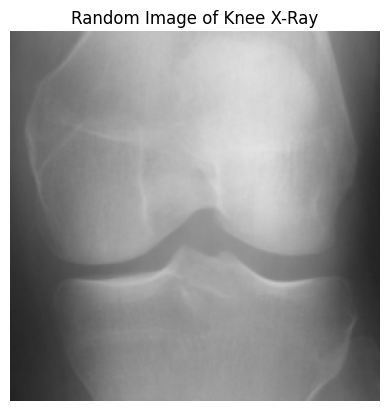

In [73]:
#look at a random image
show_image(test_img,"Random Image of Knee X-Ray")

In [74]:
# check shape and type of image
print(test_img.shape)
print(test_img.dtype)

(224, 224, 3)
uint8


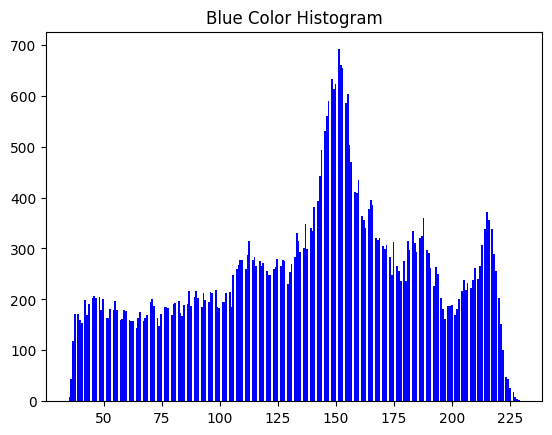

True
True


In [75]:
#histogram of blue color scale
blue=test_img[:, :, 0]
plt.hist(blue.ravel(), bins=256, color='b')
plt.title('Blue Color Histogram')
plt.show()

green=test_img[:, :, 1] #check vector for green color
red=test_img[:, :, 2] #check vector for red color

#Are all three values equal? 
print(np.array_equal(blue,green))
print(np.array_equal(blue,red))

Converting the random image to gray scale

In [76]:
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_gray.shape

(224, 224)

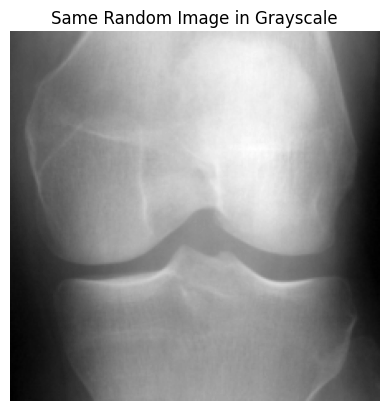

In [77]:
show_image(test_gray,"Same Random Image in Grayscale")

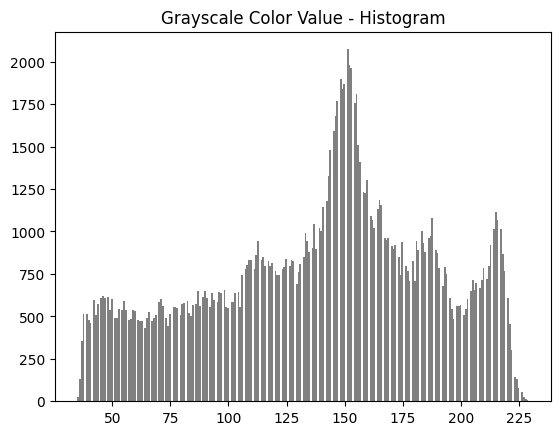

In [78]:
#spread of color depth
plt.hist(test_img.ravel(), bins=256, color='gray')
plt.title('Grayscale Color Value - Histogram')
plt.show()

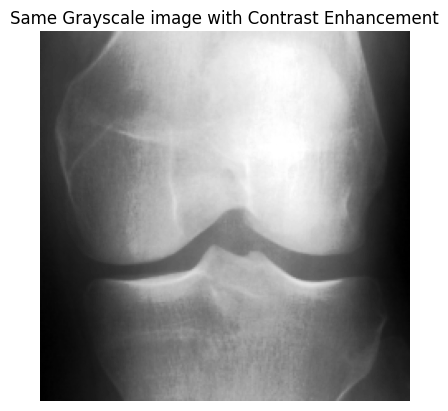

In [79]:
#Histogram Equalization
show_image(exposure.equalize_hist(test_gray),"Same Grayscale image with Contrast Enhancement")

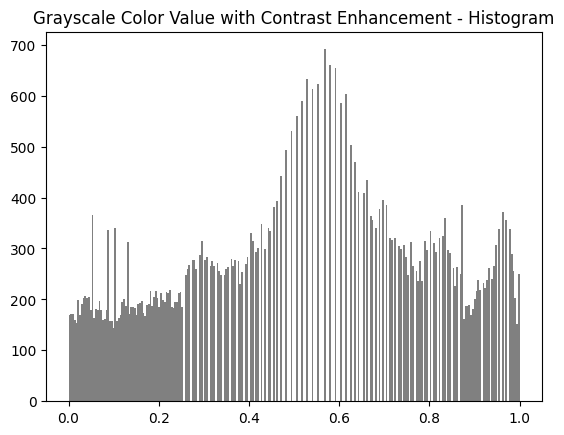

In [80]:
#Histogram Equalization
plt.hist(exposure.equalize_hist(test_gray).ravel(), bins=256, color='gray')
plt.title('Grayscale Color Value with Contrast Enhancement - Histogram')
plt.show()

In [81]:
# target_labels=['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe'] # 0,1,2,3,4

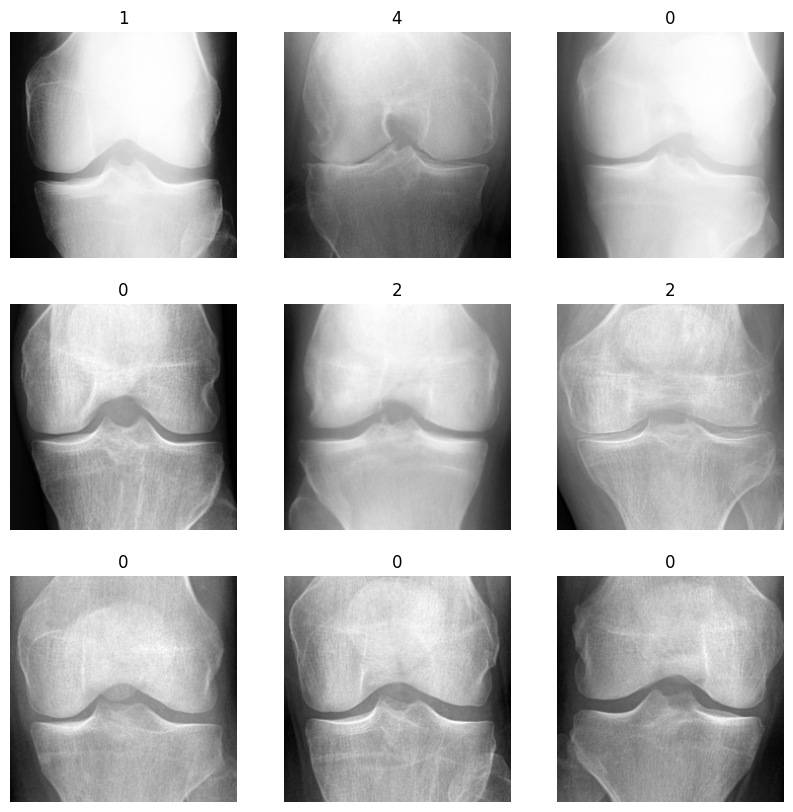

In [90]:
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]),cmap='gray')
        plt.title(int(labels[i]))
        plt.axis("off")

In [83]:
#set path for directory that contains all 3 train, validation and test sets
directory = '../Data/Raw Data/'

In [84]:
#return files with labels
def fetch_files_from_directory( dir_path ):
  file_dict = {}
  for grade in os.listdir( dir_path ):
    file_dict[grade] = os.listdir(dir_path + '/' + grade)
  return file_dict

In [85]:
#get files for all 3 sets
train_files = fetch_files_from_directory(directory+"train")
val_files = fetch_files_from_directory(directory+"val")
test_files = fetch_files_from_directory(directory+"test")

In [86]:
def plot_distribution(set_of_files, title):
    f, ax = plt.subplots(figsize=(16,6))
    keys = sorted(list(set_of_files.keys()))
    vals = [len(set_of_files[k]) for k in keys]
    sns.barplot(x=keys, y=vals, hue=keys ,palette="Blues_d")
    plt.xlabel('Knee Severity Grade')
    plt.title(title)

    # display values atop bars
    for i, p in enumerate(ax.patches):
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() + (p.get_height() * 0.015)
        value = '{:.0f}'.format(p.get_height())
        ax.text(_x, _y, value, ha="center")

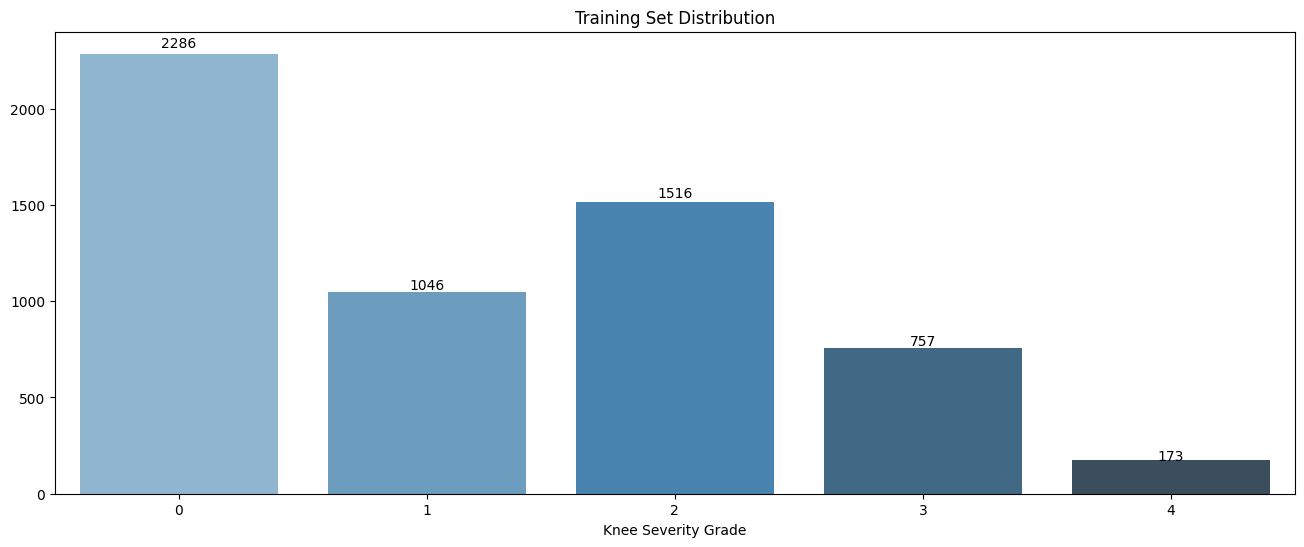

In [87]:
plot_distribution(train_files, 'Training Set Distribution')

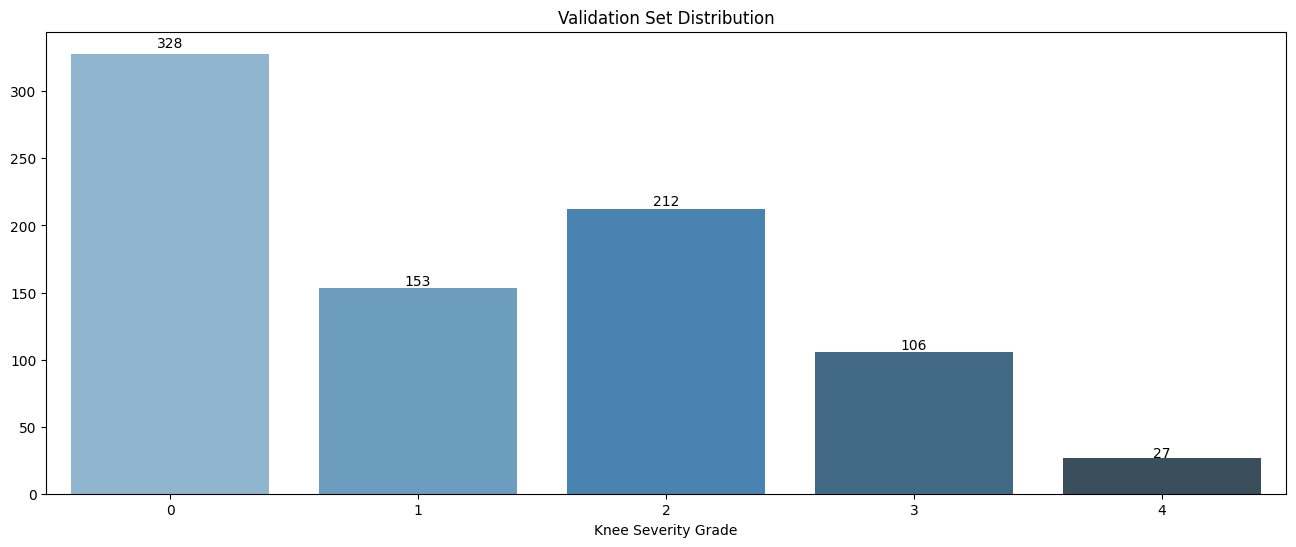

In [88]:
plot_distribution(val_files, 'Validation Set Distribution')

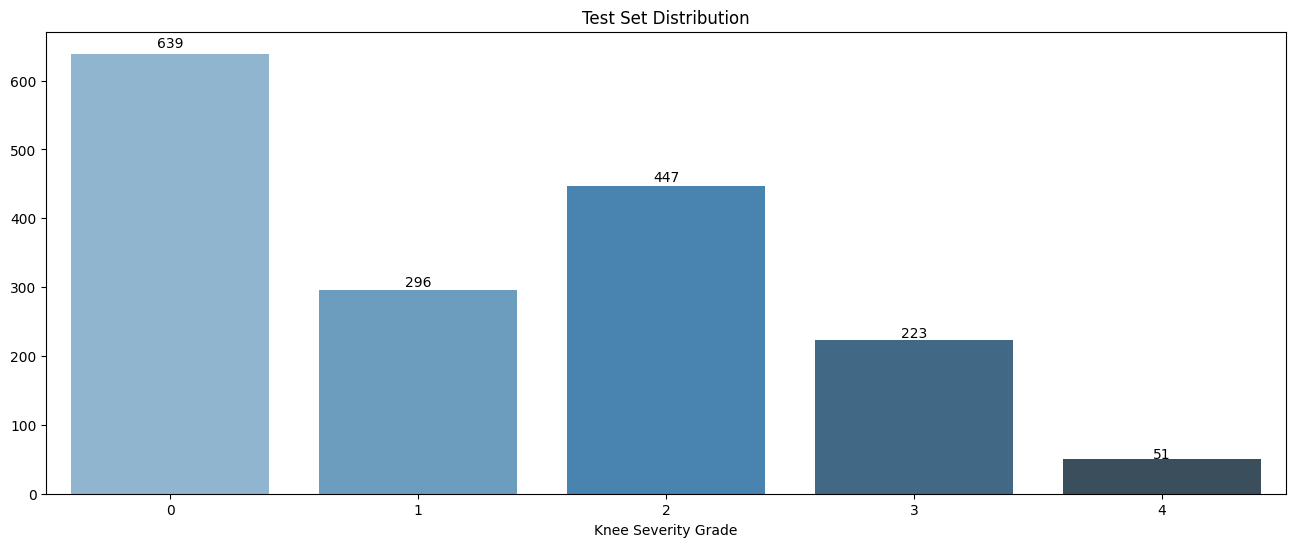

In [89]:
plot_distribution(test_files, 'Test Set Distribution')